In [1]:
# imports
import altair as alt
import pandas as pd
import sys
import os
# altair specific
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')
# adds parent directory to this notebook, so it could use relative import
sys.path.append(os.path.dirname(os.getcwd()))

# user defined modules
from src.helpers import get_data


In [2]:
# read data here
data_path = "../data/player_raw_data.csv"
# this is raw data
fifa = get_data(data_path)
# this is processed for Task 5 specific
fifa_processed = get_data(data_path, preprocess=True)

Improvements Task 1:
- Consider selection filter by Region (preffered this one)/Country(or country per each of the repeated single chart)
- The sorting of median requires manually pre-ordered levels (as a list of strings) of the attribute to be sorted. (Refer to assignment 5)
- Not necessary all countries have to appear, if they have too little counts/records, then could be omitted (or blank away by setting opacity to 0)
- Could only just show top 10/5 countries of the region as well

**NOTE**: The bullets are incorporated altogether and meant to work at the same time?

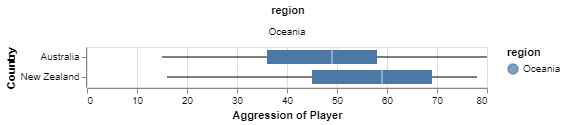

In [34]:
# get list of countries ordered by median aggression value
def task_one_viz(data):
    regions = sorted(data.region.unique())
    # country_median = fifa_processed.groupby(['country'], as_index=False).agg({'country':'first', 'region':'first', "aggression":'median'})
    # top_10_per_region_df = country_median.groupby(['region','country'])["aggression"].nlargest(100).reset_index().drop(columns='level_2') 
    # ordered_top_10 = top_10_per_region_df.sort_values(['region','aggression','country'],ascending=False).groupby('aggression')['country'].head(10).to_list()

    # radio selection
    # radio = alt.selection_single(
    # name="Select",
    # fields=["region"],
    # #init={"country": "All", "region": "Africa"},
    # bind={"region": alt.binding_radio(options=regions)}
    # )
    
    # create base plot
    aggr_base = alt.Chart(data).mark_boxplot().encode(
            x = alt.X("aggression:Q", title="Aggression of Player"),
            y = alt.Y("country:N", title="Country"),#, sort=ordered_top_10),
            color = alt.Color('region:N')
    )

    # #aggr_base
    #create chart basis to add aggr_base by horizontal concatenation
    #aggr_chart = alt.hconcat()
    aggr_chart = aggr_base.facet(
        facet='region:N'
    ).transform_filter(alt.FieldEqualPredicate(field='region', equal = region))
    
    return aggr_chart
    # honcat each of the base from different region filtered
    # for region in regions:
    #     aggr_chart |= aggr_base.add_selection(radio).transform_filter(
    #         alt.FieldEqualPredicate(field='region', equal = region)
    #     ).properties(
    #         title=f"Aggression Distribution of Players of {region}"
    #     )
    # return aggr_chart
    #return aggr_chart

t1_plot = task_one_viz(fifa_processed)
t1_plot